In [1]:
import os
import numpy as np
import pandas as pd
from scroutines.config_plots import *

In [2]:
ddir = '/u/home/f/f7xiesnm/project-zipursky/easifish/lt185/proc/r1-v1'
!ls $ddir
# n5dir = '/data/qlyu/v1/data/easifish/lt186/r1/stitching/export.n5'
f1 = os.path.join(ddir, 'roi.csv')
f2 = os.path.join(ddir, 'spotcount.csv') #_intn.csv')

roi_all.csv  roi.csv  spotcount.csv


In [3]:
def rot2d(x, y, theta):
    """ rotate by theta
    """
    theta_rad = theta/180*np.pi
    R  = np.array([[np.cos(theta_rad), -np.sin(theta_rad),],
                   [np.sin(theta_rad),  np.cos(theta_rad),],
                  ])
    xy = np.vstack([x,y])
    xyr = R.dot(xy) 
    return xyr[0], xyr[1]


In [4]:
def plot_easifish_proj(df, x, y, hue='lbl_v2', na_rep='NA', invert_yaxis=False, figsize=(8,8)):
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(data=df, 
                    x=x, y=y, color='lightgray', s=2, edgecolor='none')
    sns.scatterplot(data=df[df[hue]!=na_rep], 
                    x=x, y=y, hue=hue, palette=palette, s=5, edgecolor='none')
    if invert_yaxis:
        ax.invert_yaxis()
        
    ax.grid(False)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

In [5]:
df1 = pd.read_csv(f1, index_col=0)
df2 = pd.read_csv(f2, index_col=0)
df  = df1.join(df2)

In [6]:
amin, amax = 500, 5000
cond = ((df['area'] < amax) & (df['area'] > amin))
df = df[cond]

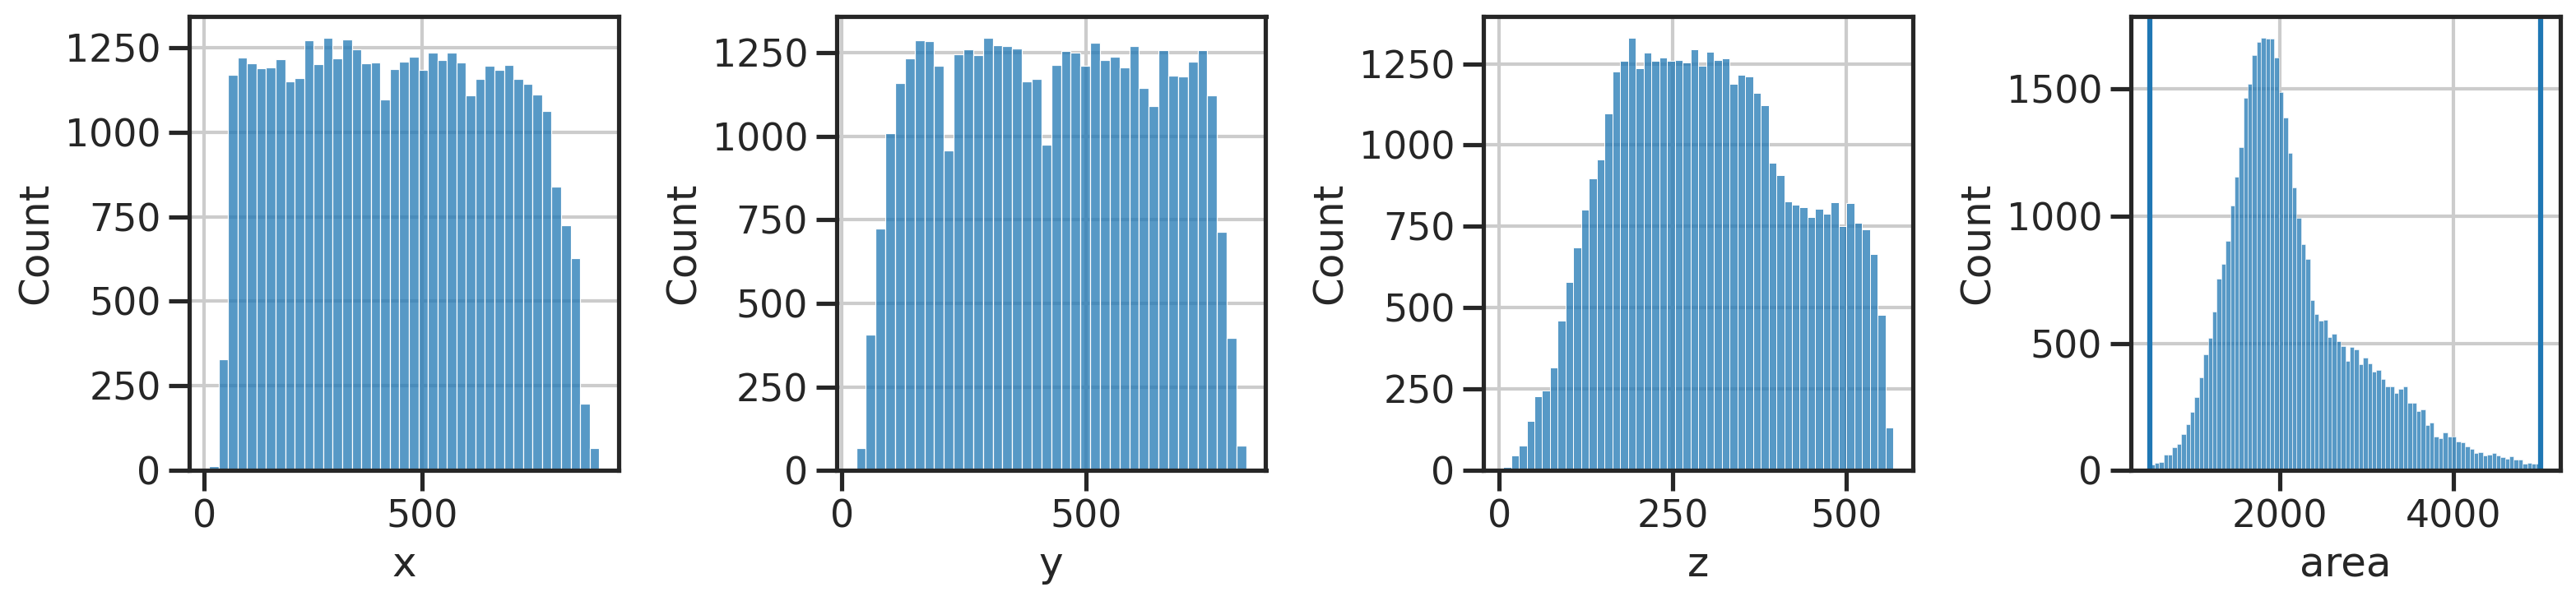

In [7]:
# cell level stats
fig, axs = plt.subplots(1,4,figsize=(4*4,1*4))
ax = axs[0]
sns.histplot(df['x'].values, ax=ax)
ax.set_xlabel('x')
ax = axs[1]
sns.histplot(df['y'].values, ax=ax)
ax.set_xlabel('y')
ax = axs[2]
sns.histplot(df['z'].values, ax=ax)
ax.set_xlabel('z')
ax = axs[3]
sns.histplot(df['area'].values, ax=ax)
ax.set_xlabel('area')
ax.axvline(amin)
ax.axvline(amax)
fig.tight_layout()
plt.show()

In [8]:
df.describe()

z             y             x          area         r1_c0  \
count  43293.000000  43293.000000  43293.000000  43293.000000  43293.000000   
mean     303.341879    429.294340    442.826461   2152.563110      0.857737   
std      127.427637    207.171374    229.515991    765.548115      3.456975   
min        5.811050     29.197816     10.484906    505.503936      0.000000   
25%      200.893865    253.022335    245.863289   1635.244800      0.000000   
50%      297.060648    431.521473    441.363244   1970.114496      0.000000   
75%      399.637416    605.796751    639.204644   2534.629440      1.000000   
max      567.233682    828.593245    907.129236   4999.583232    181.000000   

              r1_c2  
count  43293.000000  
mean       0.646155  
std        3.161045  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       88.000000

In [9]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# df[['xr', 'yr', 'zr']]= pca.fit_transform(df[['x', 'y', 'z']])

In [10]:
channels = [
    'r1_c0',  'r1_c2',
]
genes = [
    'RL (Cre)',
    'LM (FlpO)',
]

In [15]:
def rename(code):
    rename_dict = {
        0: 'NA', 
        1: 'RL', 
        2: 'LM', 
        3: 'both'}
    return rename_dict[code]

df = df.copy()
th_c0 = 10 
th_c2 = 5 
df['bi_r1_c0'] = df['r1_c0'] > th_c0 
df['bi_r1_c2'] = df['r1_c2'] > th_c2 
df['lbl'] = df['bi_r1_c0'].astype(int) + 2*df['bi_r1_c2'].astype(int)
df['lbl_v2'] = df['lbl'].apply(rename)
np.unique(df['lbl'].values)
np.unique(df['lbl_v2'].values)


array(['LM', 'NA', 'RL', 'both'], dtype=object)

In [16]:
sns.color_palette('tab10', 10)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [17]:
palette = {
    'NA': 'lightgray', 
    'LM': 'C3', 
    'RL': 'C0', 
    'both': 'C6', 
}

In [18]:
df.value_counts('lbl_v2')

lbl_v2
NA      41346
LM       1371
RL        495
both       81
dtype: int64

In [19]:
a = df.value_counts('lbl_v2')
print(a/len(df)*100, "\n")

print(f"both in LM (%): {a.loc['both']/(a.loc['both']+a.loc['LM'])*100:.1f}")
print(f"both in RL (%): {a.loc['both']/(a.loc['both']+a.loc['RL'])*100:.1f}")
print(f"RL/LM (%): {(a.loc['both']+a.loc['RL'])/(a.loc['both']+a.loc['LM'])*100:.1f}")

lbl_v2
NA      95.502737
LM       3.166794
RL       1.143372
both     0.187097
dtype: float64 

both in LM (%): 5.6
both in RL (%): 14.1
RL/LM (%): 39.7


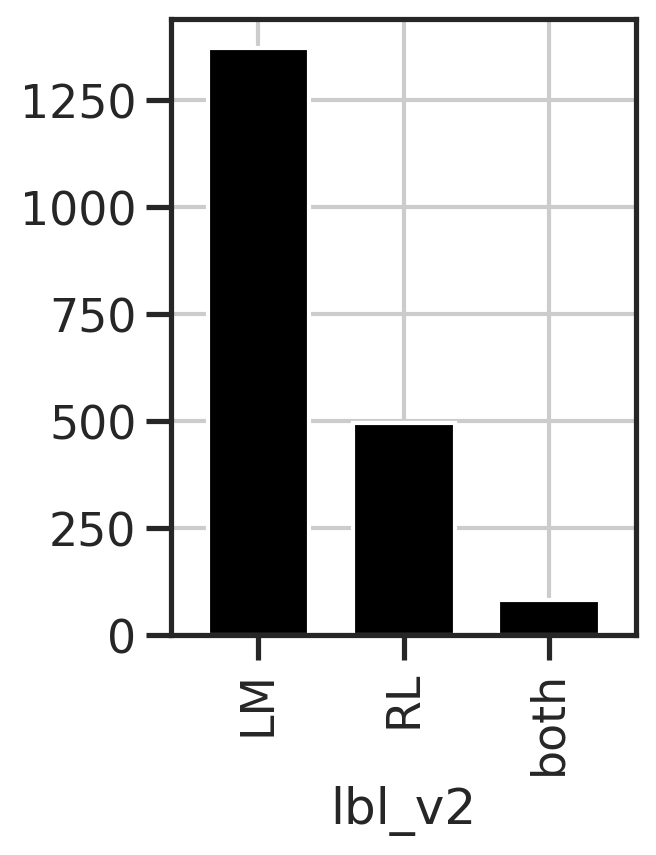

In [20]:
fig, ax = plt.subplots(figsize=(3,4))
df[df['lbl_v2']!='NA'].value_counts('lbl_v2').plot.bar(width=0.7, color='black')
plt.show()

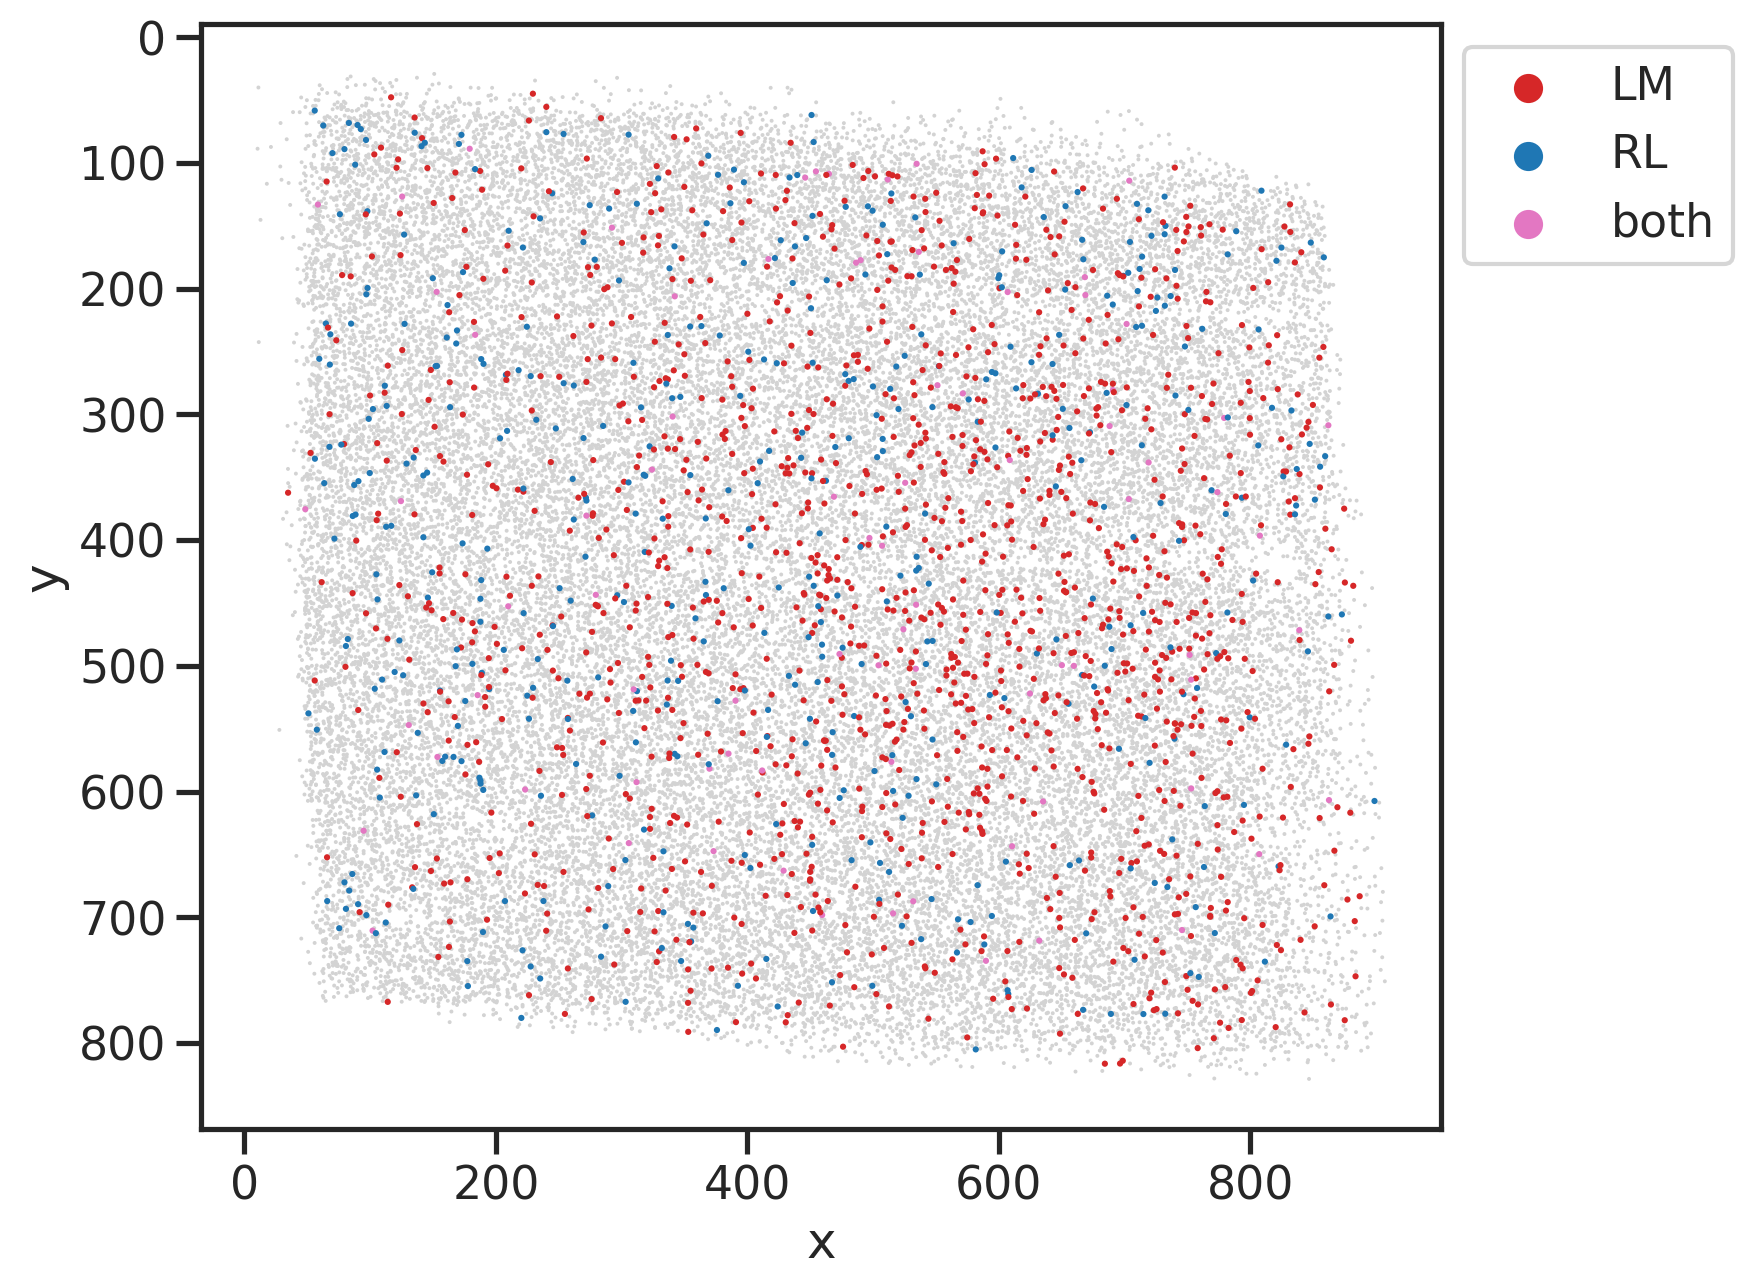

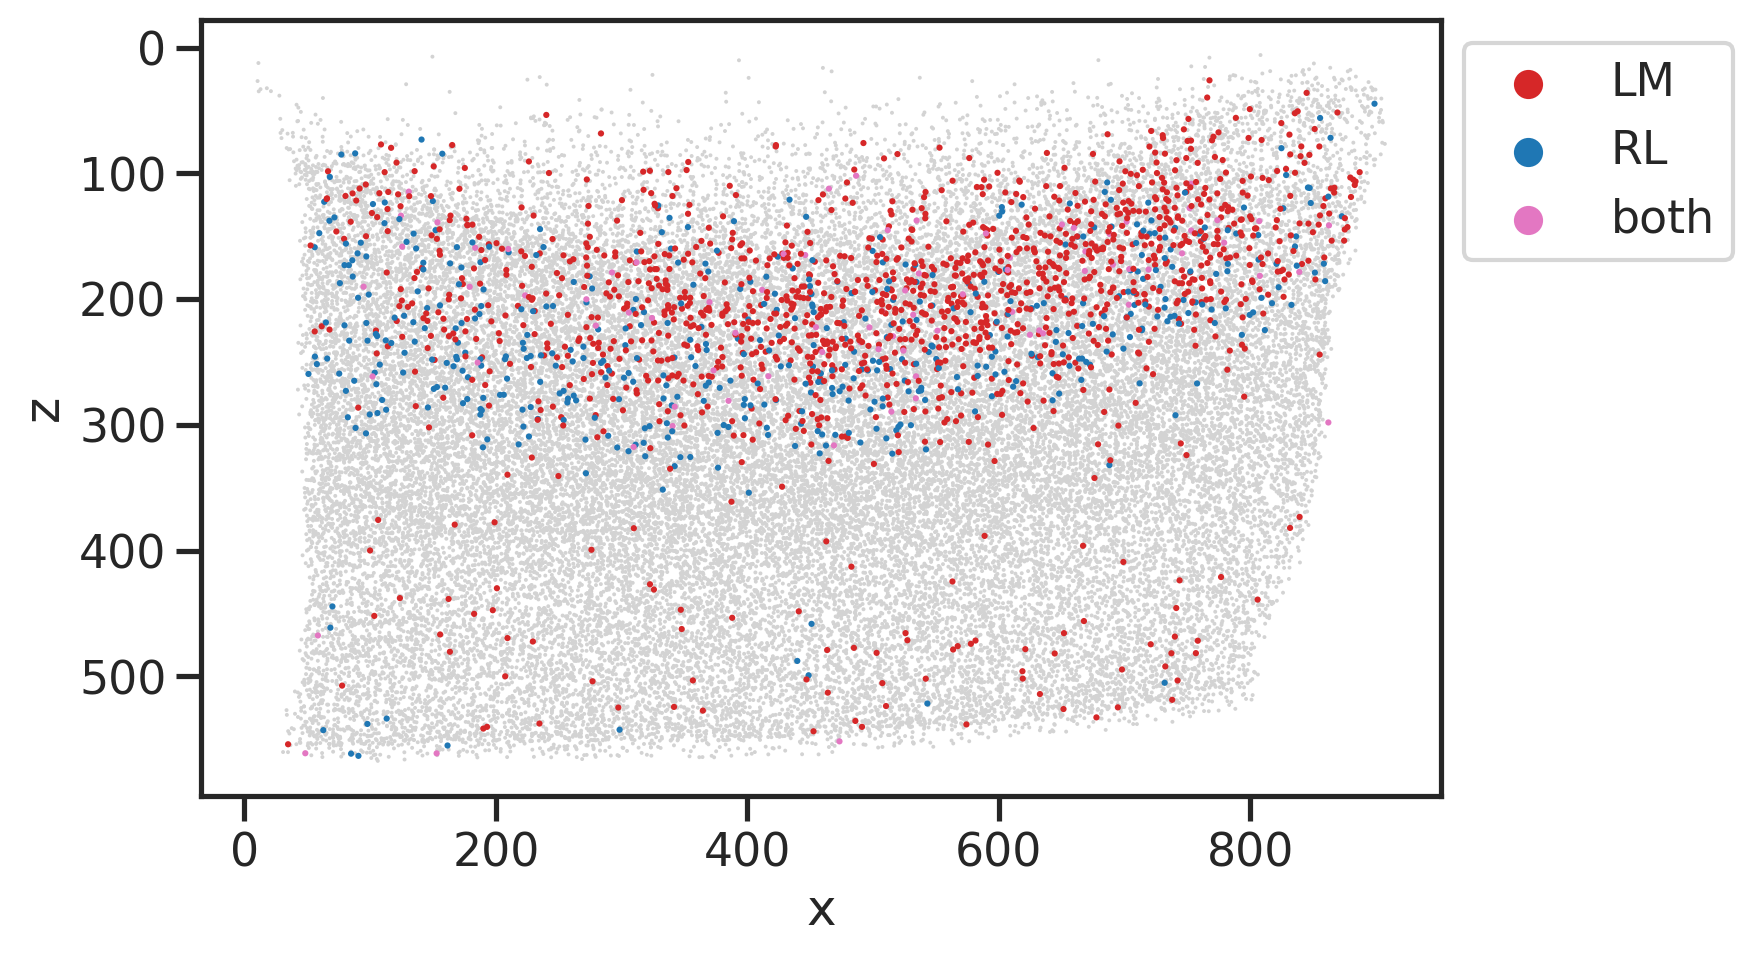

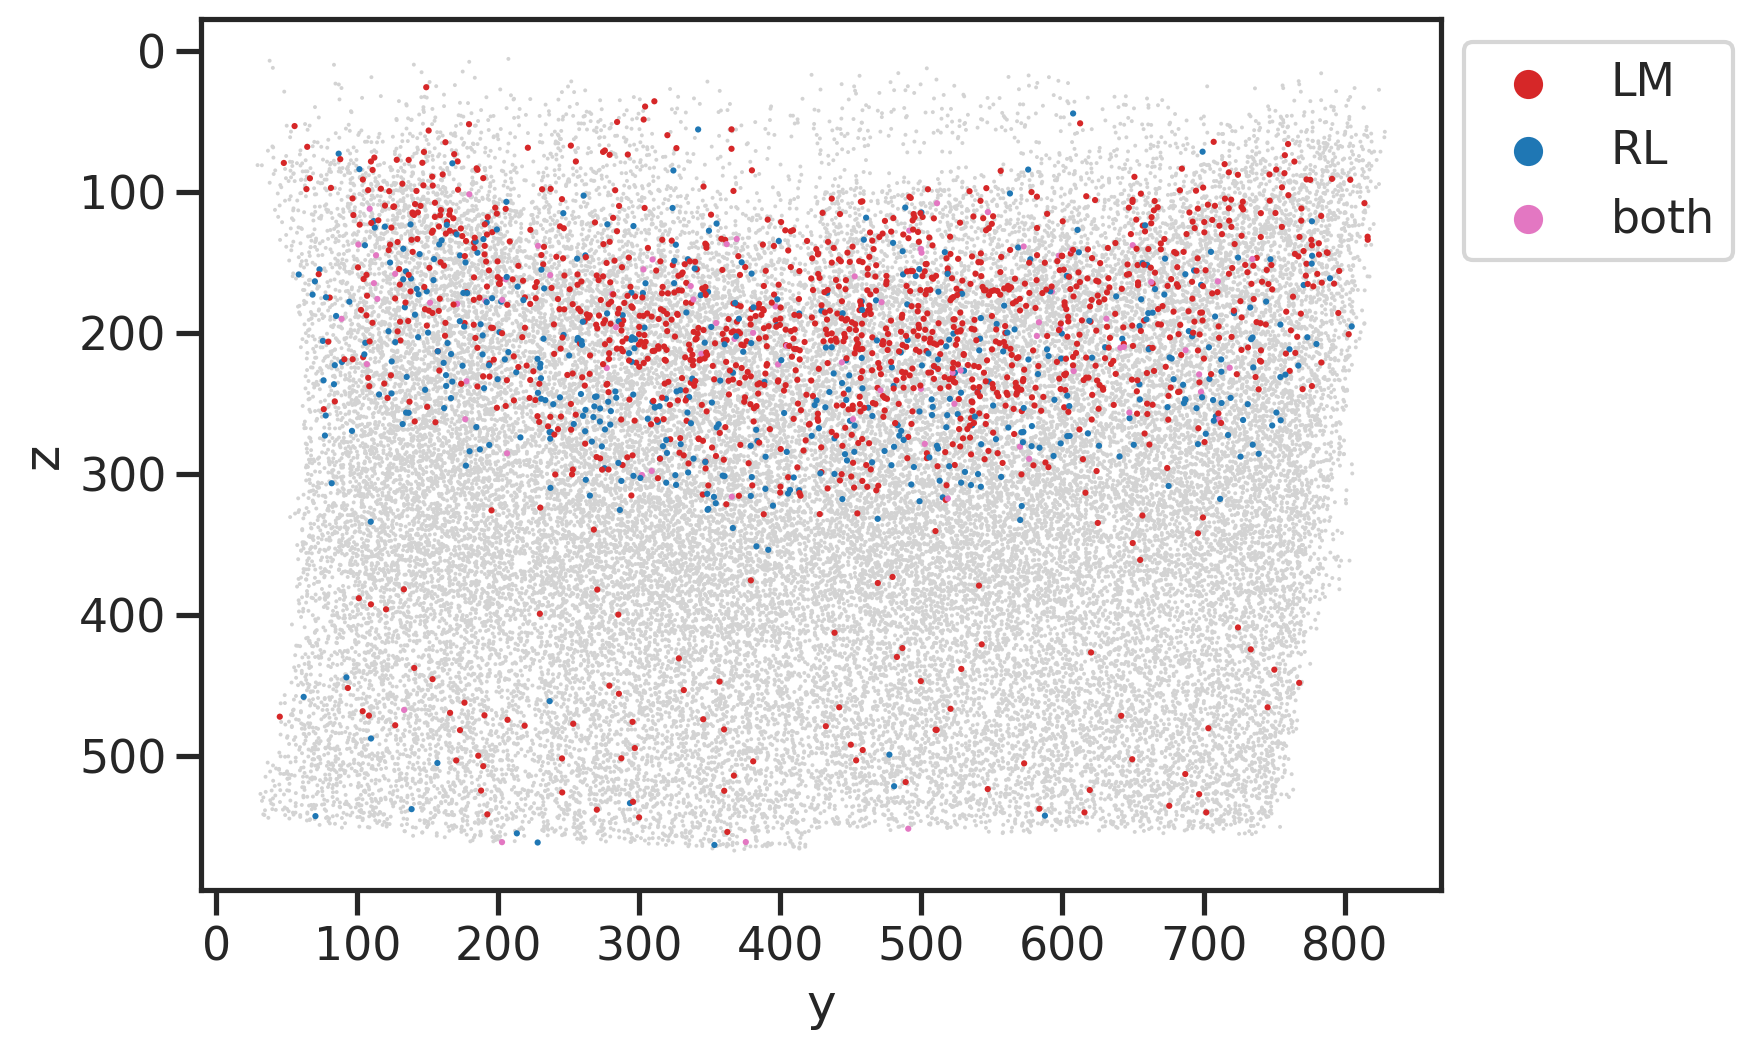

In [21]:
plot_easifish_proj(df, 'x', 'y', invert_yaxis=True)
plot_easifish_proj(df, 'x', 'z', invert_yaxis=True)
plot_easifish_proj(df, 'y', 'z', invert_yaxis=True)

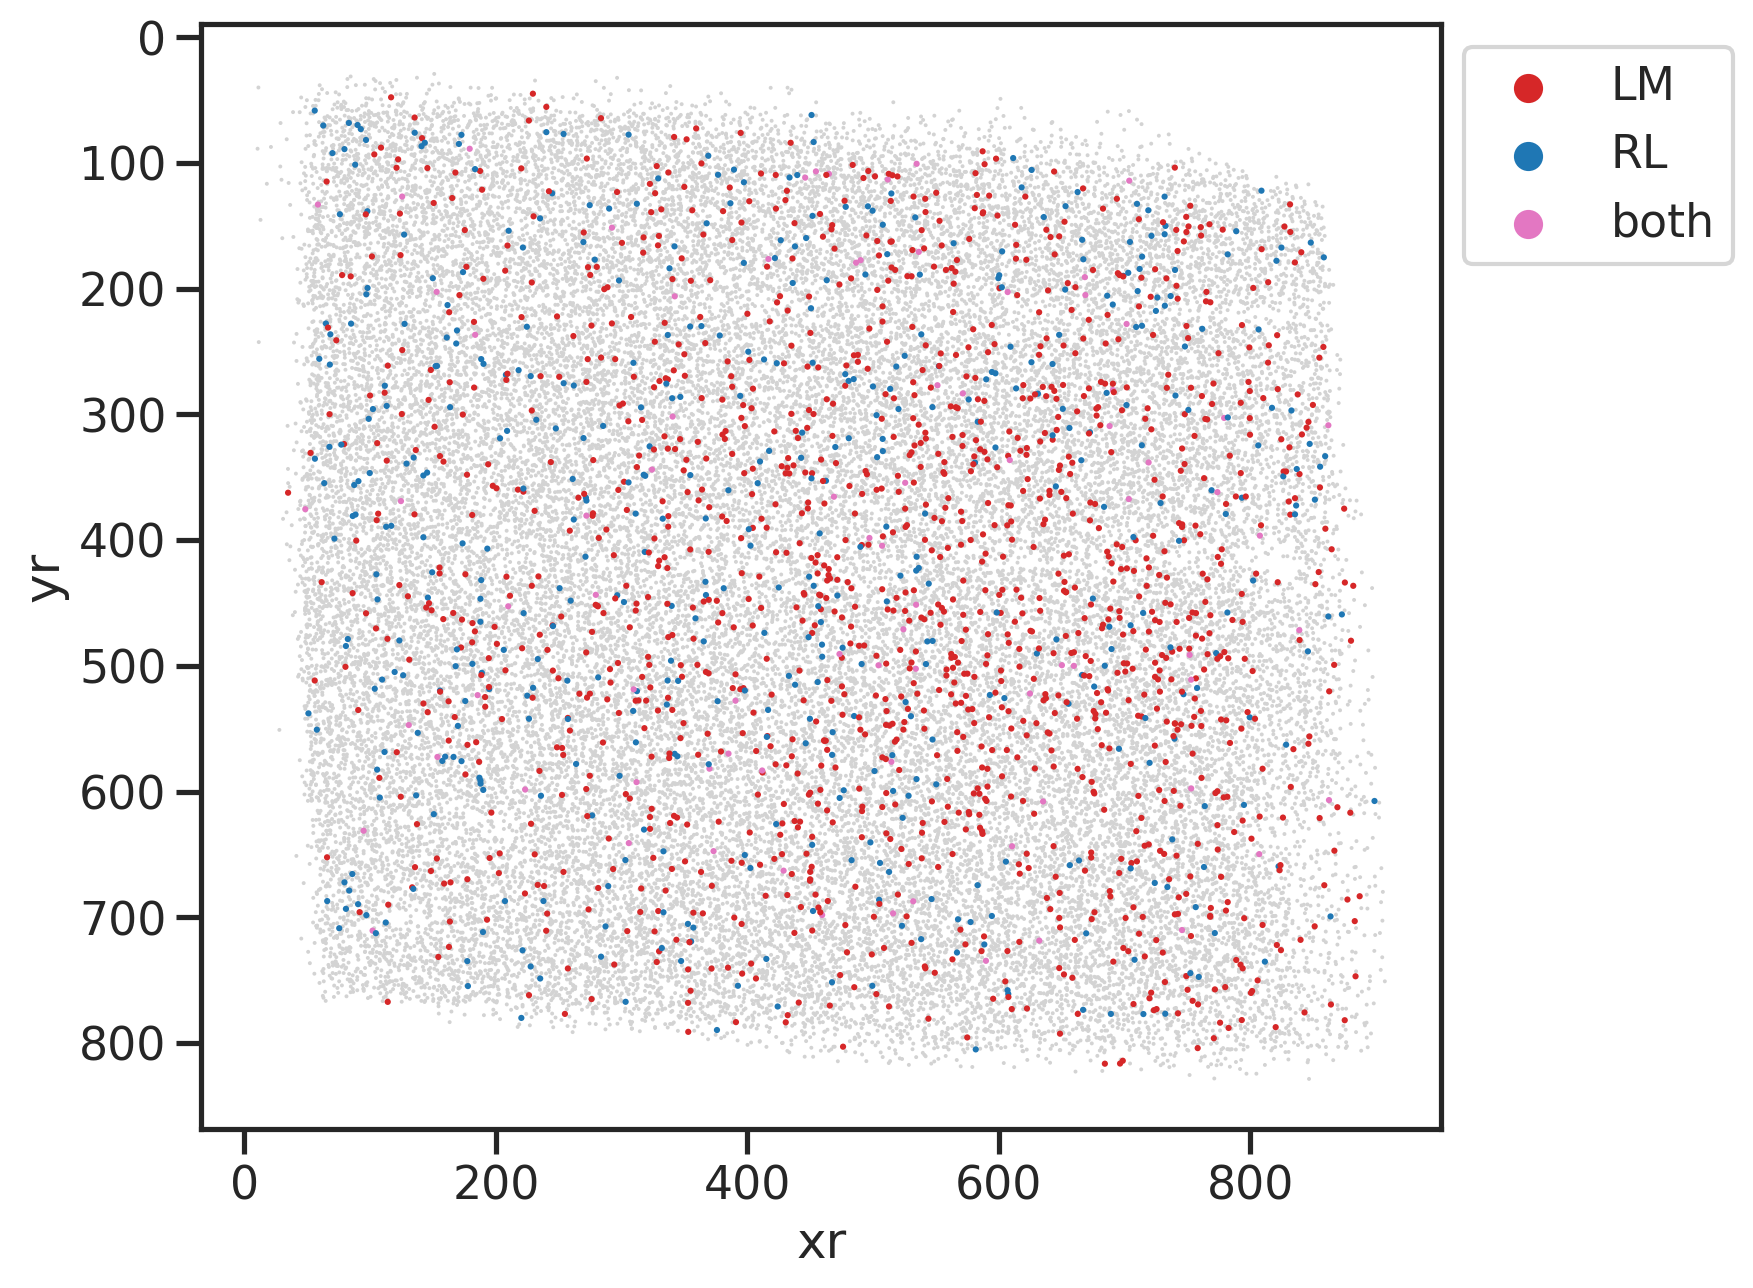

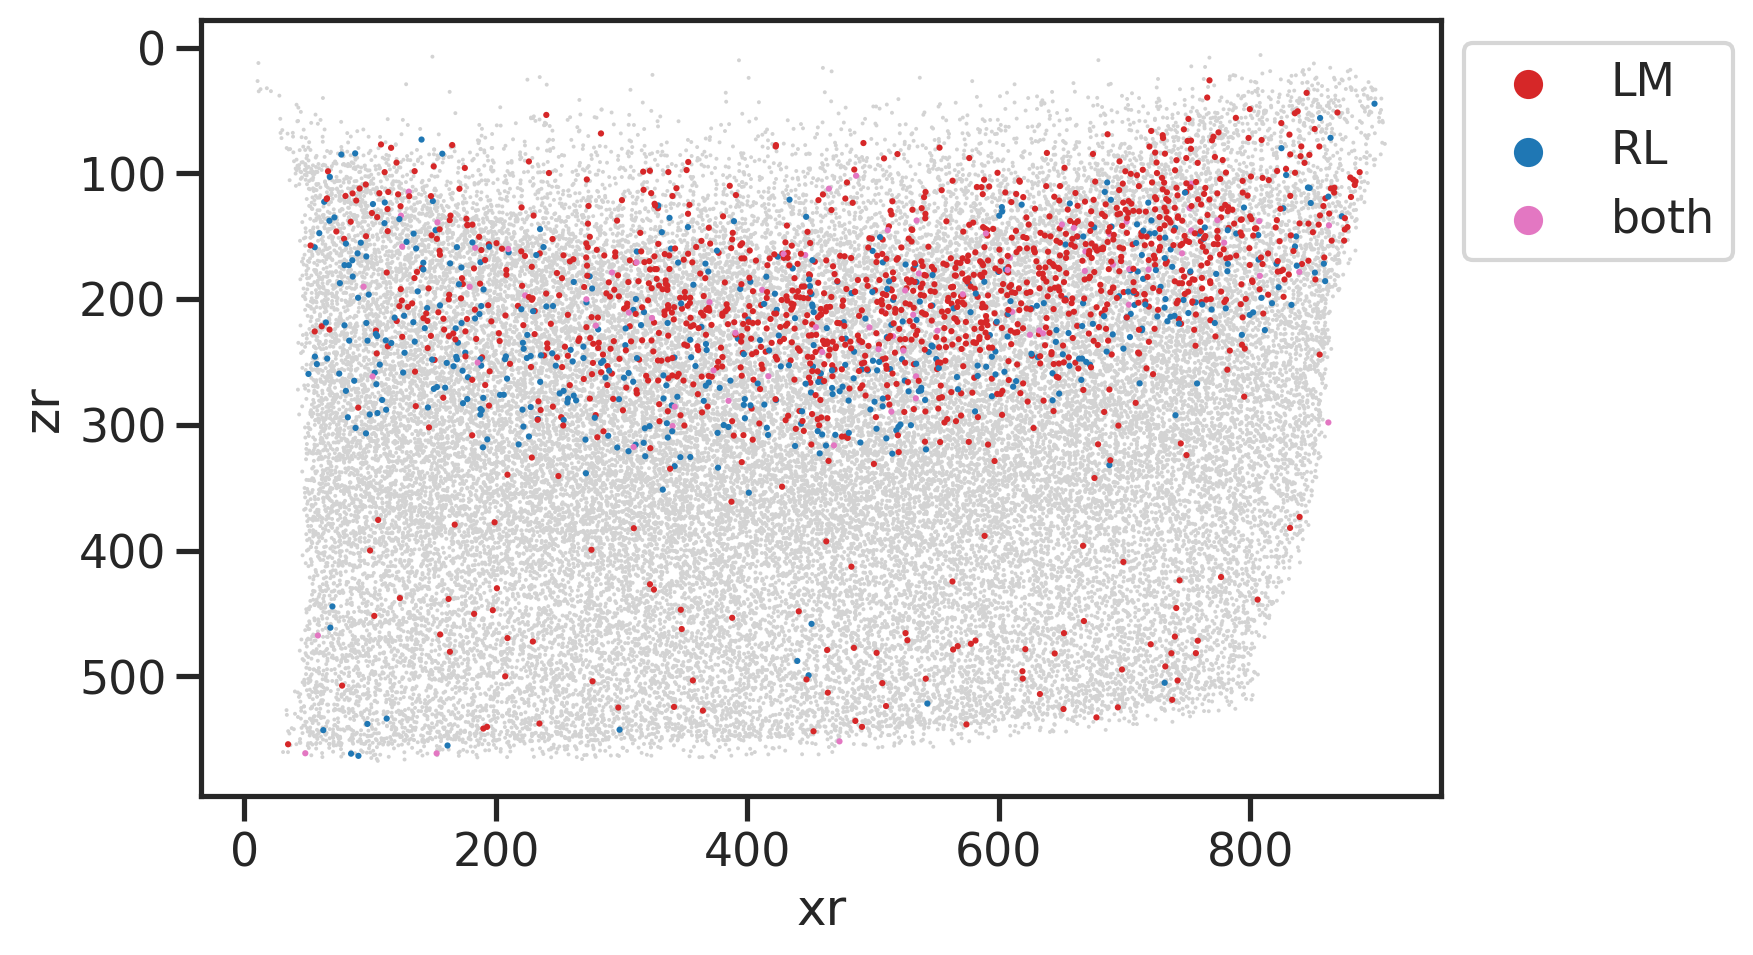

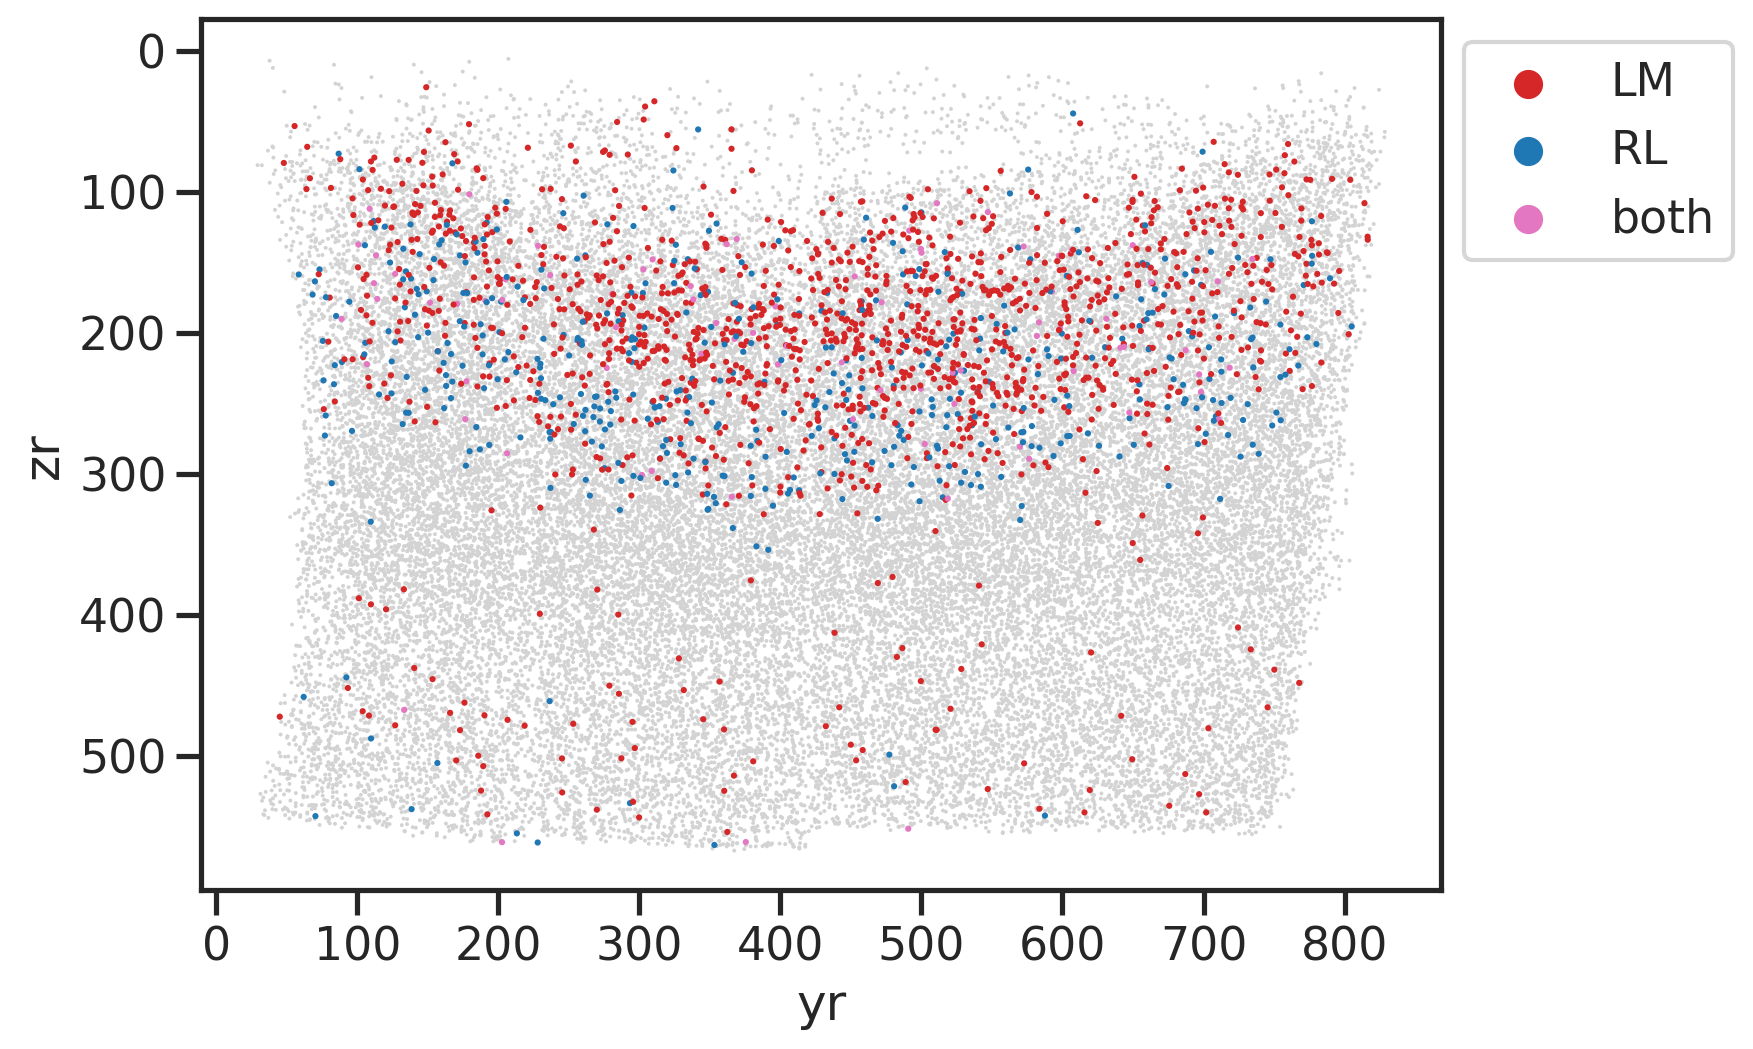

In [23]:
df['yr'] = df['y']
df['xr'], df['zr'] = rot2d(df['x'], df['z'], 0)

plot_easifish_proj(df, 'xr', 'yr', invert_yaxis=True)
plot_easifish_proj(df, 'xr', 'zr', invert_yaxis=True)
plot_easifish_proj(df, 'yr', 'zr', invert_yaxis=True)

In [24]:
xmin, ymin, zmin = df[['xr', 'yr', 'zr']].min()
xmax, ymax, zmax = df[['xr', 'yr', 'zr']].max()
print(xmin, ymin, zmin)
print(xmax, ymax, zmax)

step = 25
xbins = np.arange(0, xmax+step, step).astype(int)
ybins = np.arange(0, ymax+step, step).astype(int)
zbins = np.arange(0, zmax+step, step).astype(int)
print(xbins, ybins, zbins, xbins.shape, ybins.shape, zbins.shape)

df['xrbin'] = pd.cut(df['xr'], bins=xbins, labels=False) #.astype(int)
df['yrbin'] = pd.cut(df['yr'], bins=ybins, labels=False)
df['zrbin'] = pd.cut(df['zr'], bins=zbins, labels=False)
df

10.48490566037736 29.197815810920947 5.811049723756906
907.1292360430951 828.5932452896637 567.2336815920397
[  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875
 900 925] [  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850] [  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475 500 525 550 575] (38,) (35,) (24,)


z           y           x         area  r1_c0  r1_c2  \
roi                                                                    
1      460.779196  112.874078  477.967940  4014.881472    0.0    0.0   
2      475.400303  324.226345   75.969252  3565.544640    1.0    0.0   
3      434.820055   88.902940  315.572571  3902.547264    1.0    0.0   
4      444.064622  143.898558   96.726323  3184.461504    1.0    0.0   
5      487.068501  180.152986  168.423651  3442.545792    1.0    0.0   
...           ...         ...         ...          ...    ...    ...   
43807  320.958028  401.679428  824.203973  1990.021824    0.0    0.0   
43808  175.215515  286.213859  631.724970   703.866240    0.0    0.0   
43809  188.807940  217.499866  671.460536   848.905344    0.0    0.0   
43810  275.519454  231.875270  284.718181  1094.192064    0.0    0.0   
43811  257.284054  153.108069  105.603745  1473.142272    0.0    0.0   

       bi_r1_c0  bi_r1_c2  lbl lbl_v2          yr          xr          zr  \
roi                                                                         
1         False     False    0     NA  112.874078  477.967940  460.779196   
2         False     False    0     NA  324.226345   75.969252  475.400303   
3         False     False    0     NA   88.902940  315.572571  434.820055   
4         False     False    0     NA  143.898558   96.726323  444.064622   
5         False     False    0     NA  180.152986  168.423651  487.068501   
...         ...       ...  ...    ...         ...         ...         ...   
43807     False     False    0     NA  401.679428  824.203973  320.958028   
43808     False     False    0     NA  286.213859  631.724970  175.215515   
43809     False     False    0     NA  217.499866  671.460536  188.807940   
43810     False     False    0     NA  231.875270  284.718181  275.519454   
43811     False     False    0     NA  153.108069  105.603745  257.284054   

       xrbin  yrbin  zrbin  
roi                         
1         19      4     18  
2          3     12     19  
3         12      3     17  
4          3      5     17  
5          6      7     19  
...      ...    ...    ...  
43807     32     16     12  
43808     25     11      7  
43809     26      8      7  
43810     11      9     11  
43811      4      6     10  

[43293 rows x 16 columns]

In [25]:
step = 50
xbins2 = np.arange(0, xmax+step, step).astype(int)
ybins2 = np.arange(0, ymax+step, step).astype(int)
zbins2 = np.arange(0, zmax+step, step).astype(int)
print(xbins2, ybins2, zbins2, xbins2.shape, ybins2.shape, zbins2.shape)

df[f'xrbin_s{step}'] = pd.cut(df['xr'], bins=xbins2, labels=False) #.astype(int)
df[f'yrbin_s{step}'] = pd.cut(df['yr'], bins=ybins2, labels=False)
df[f'zrbin_s{step}'] = pd.cut(df['zr'], bins=zbins2, labels=False)

[  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850
 900 950] [  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850] [  0  50 100 150 200 250 300 350 400 450 500 550 600] (20,) (18,) (13,)


In [26]:
step = 100
xbins3 = np.arange(0, xmax+step, step).astype(int)
ybins3 = np.arange(0, ymax+step, step).astype(int)
zbins3 = np.arange(0, zmax+step, step).astype(int)
print(xbins3, ybins3, zbins3, xbins3.shape, ybins3.shape, zbins3.shape)

df[f'xrbin_s{step}'] = pd.cut(df['xr'], bins=xbins3, labels=False) #.astype(int)
df[f'yrbin_s{step}'] = pd.cut(df['yr'], bins=ybins3, labels=False)
df[f'zrbin_s{step}'] = pd.cut(df['zr'], bins=zbins3, labels=False)

[   0  100  200  300  400  500  600  700  800  900 1000] [  0 100 200 300 400 500 600 700 800 900] [  0 100 200 300 400 500 600] (11,) (10,) (7,)


In [27]:
dfsize_x = df.groupby(['xrbin', 'lbl_v2']).size().unstack().fillna(0) #mean().unstack()
dfsize_y = df.groupby(['yrbin', 'lbl_v2']).size().unstack().fillna(0) #mean().unstack()
dfsize_z = df.groupby(['zrbin', 'lbl_v2']).size().unstack().fillna(0) #mean().unstack()



In [28]:
dfsize_s100 = df.groupby(['xrbin_s100', 'yrbin_s100',  'zrbin_s100', 'lbl_v2']).size() # .unstack().fillna(0) #mean().unstack()
dfsize_s100

xrbin_s100  yrbin_s100  zrbin_s100  lbl_v2
0           0           0           NA        31
                        1           NA        44
                                    RL         4
                        2           NA        28
                                    RL         1
                                              ..
8           8           0           NA        15
                        1           NA         9
                        2           NA         3
9           6           0           NA         5
            7           0           NA         5
Length: 880, dtype: int64

In [29]:

# xz
dfsize_xz1 = df[df['lbl_v2']=='LM'].groupby(['xrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xz1 = dfsize_xz1.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xz1 = dfsize_xz1.fillna(0).astype(int)

dfsize_xz2 = df[df['lbl_v2']=='RL'].groupby(['xrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xz2 = dfsize_xz2.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xz2 = dfsize_xz2.fillna(0).astype(int)

dfsize_xz3 = df[df['lbl_v2']=='both'].groupby(['xrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xz3 = dfsize_xz3.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xz3 = dfsize_xz3.fillna(0).astype(int)

# yz
dfsize_yz1 = df[df['lbl_v2']=='LM'].groupby(['yrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_yz1 = dfsize_yz1.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_yz1 = dfsize_yz1.fillna(0).astype(int)

dfsize_yz2 = df[df['lbl_v2']=='RL'].groupby(['yrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_yz2 = dfsize_yz2.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_yz2 = dfsize_yz2.fillna(0).astype(int)

dfsize_yz3 = df[df['lbl_v2']=='both'].groupby(['yrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_yz3 = dfsize_yz3.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_yz3 = dfsize_yz3.fillna(0).astype(int)

# xy
dfsize_xy1 = df[df['lbl_v2']=='LM'].groupby(['xrbin', 'yrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xy1 = dfsize_xy1.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xy1 = dfsize_xy1.fillna(0).astype(int)

dfsize_xy2 = df[df['lbl_v2']=='RL'].groupby(['xrbin', 'yrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xy2 = dfsize_xy2.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xy2 = dfsize_xy2.fillna(0).astype(int)

dfsize_xy3 = df[df['lbl_v2']=='both'].groupby(['xrbin', 'yrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xy3 = dfsize_xy3.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xy3 = dfsize_xy3.fillna(0).astype(int)

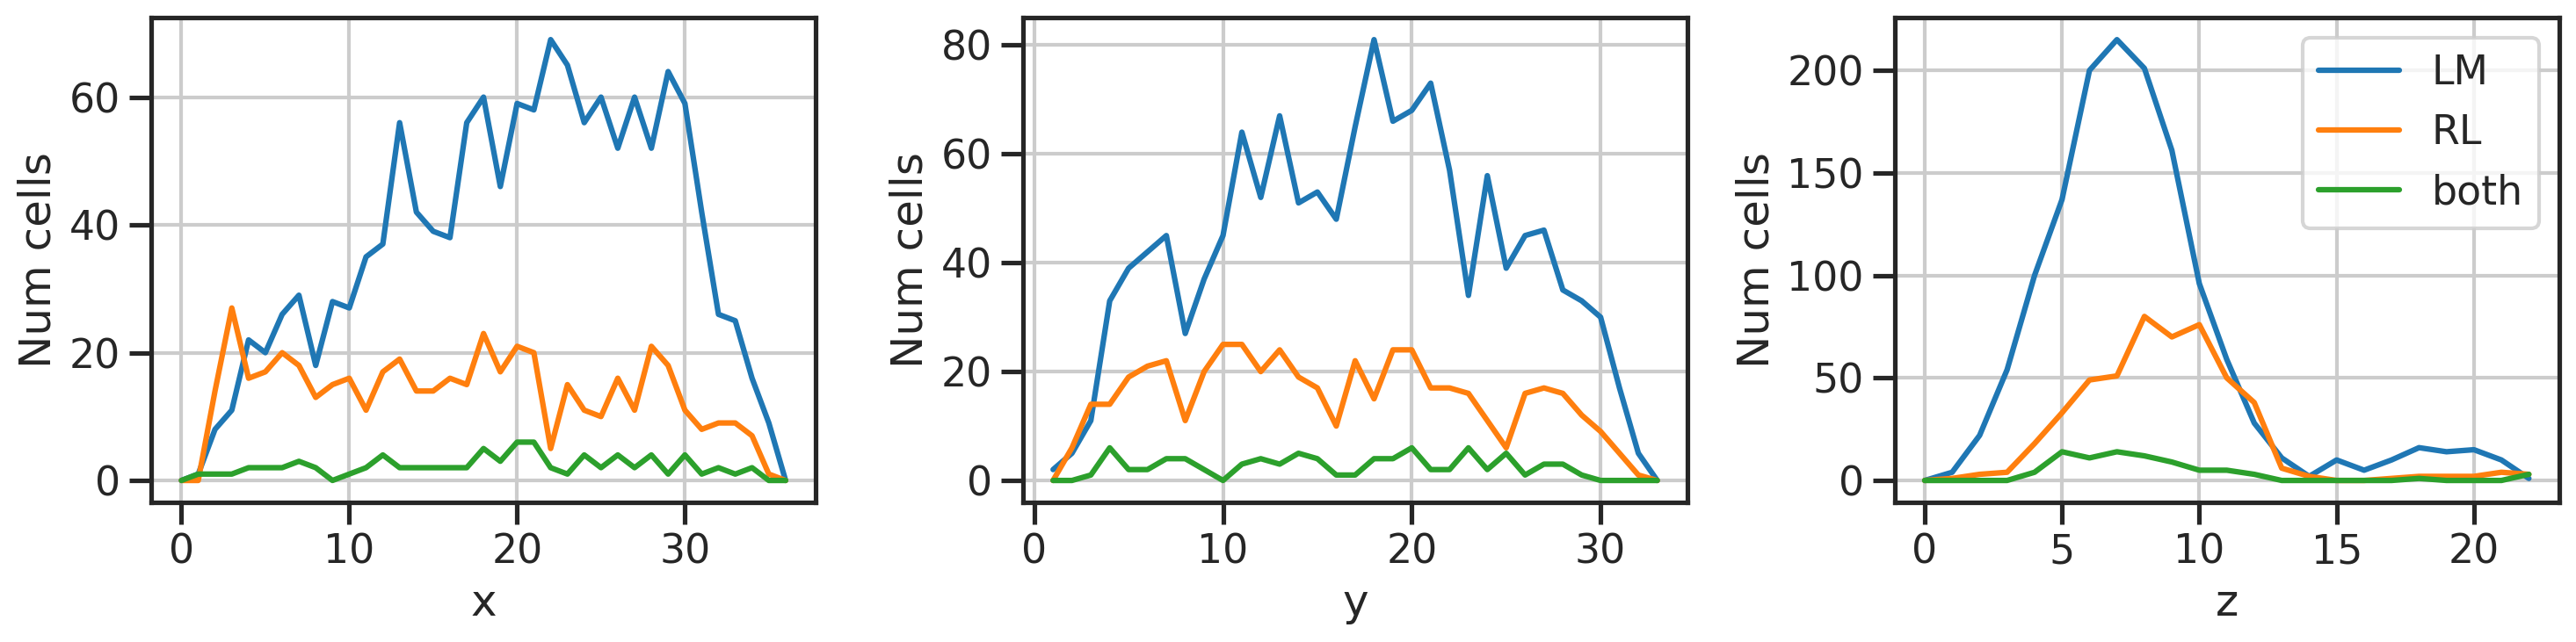

In [30]:
fig, axs = plt.subplots(1,3,figsize=(3*5,1*4))
ax = axs[0]
ax.plot(dfsize_x['LM'], label='LM')
ax.plot(dfsize_x['RL'], label='RL')
ax.plot(dfsize_x['both'], label='both')
ax.set_xlabel('x')
ax.set_ylabel('Num cells')

ax = axs[1]
ax.plot(dfsize_y['LM'], label='LM')
ax.plot(dfsize_y['RL'], label='RL')
ax.plot(dfsize_y['both'], label='both')
ax.set_xlabel('y')
ax.set_ylabel('Num cells')

ax = axs[2]
ax.plot(dfsize_z['LM'], label='LM')
ax.plot(dfsize_z['RL'], label='RL')
ax.plot(dfsize_z['both'], label='both')
ax.set_xlabel('z')
ax.set_ylabel('Num cells')
ax.legend()

fig.tight_layout()

Text(0, 0.5, 'Frac. labeled cells')

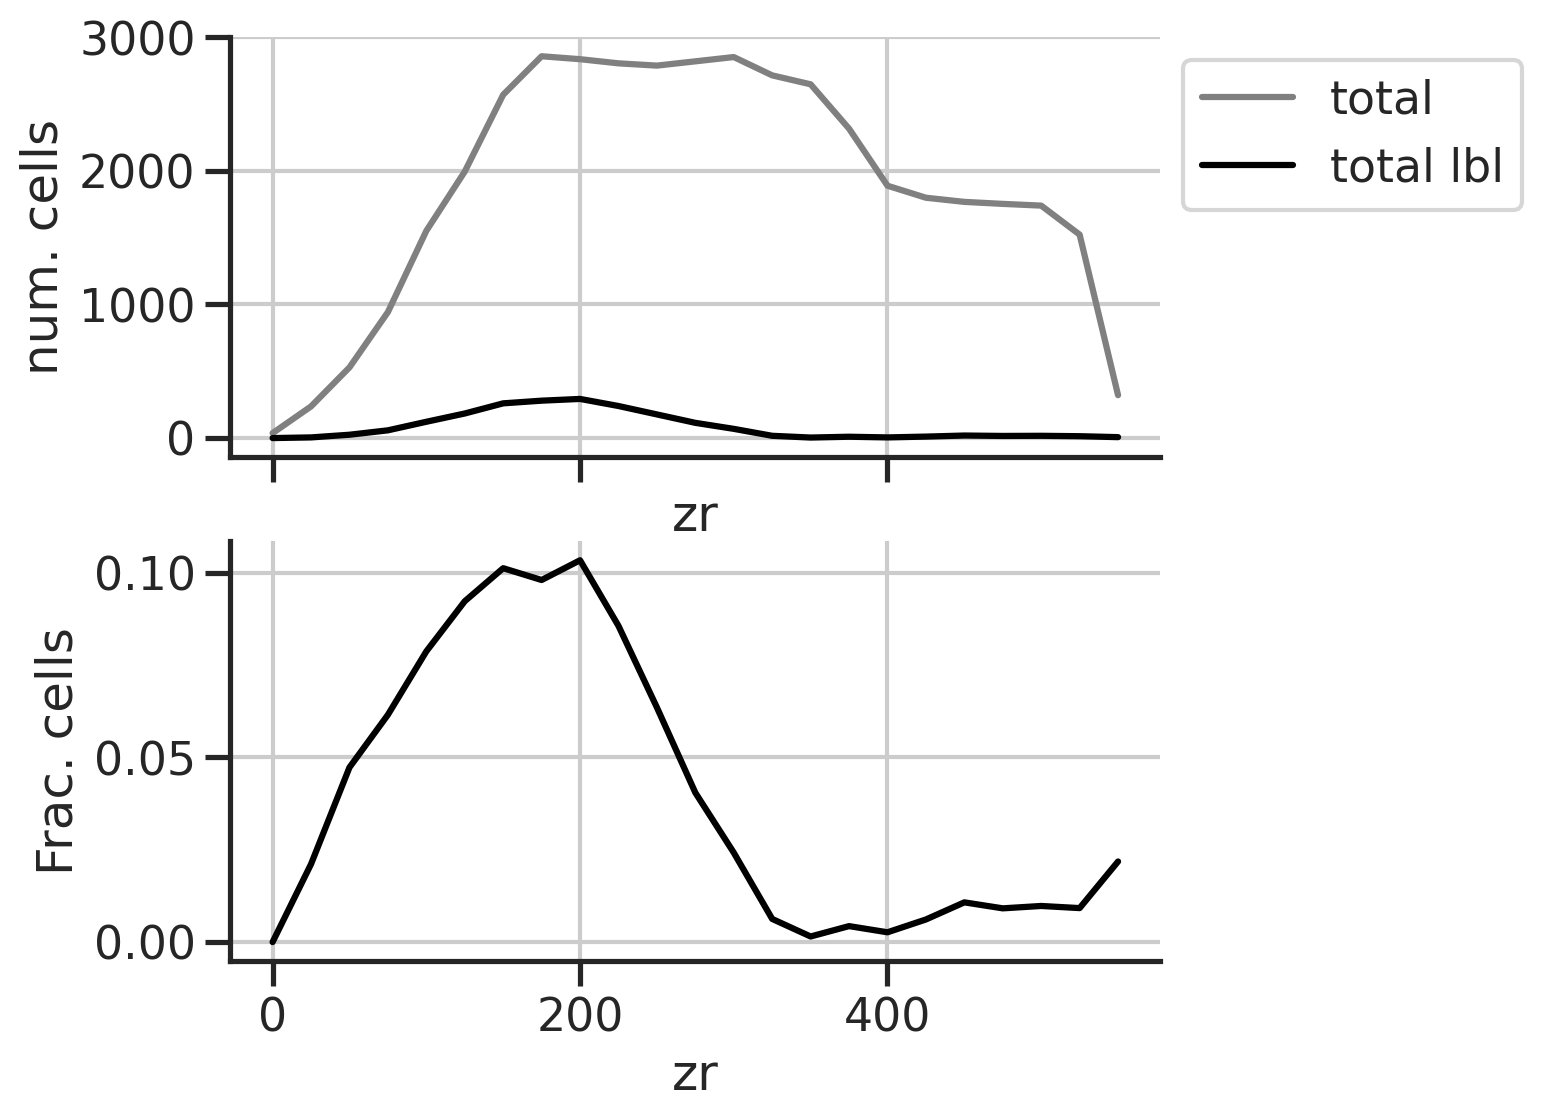

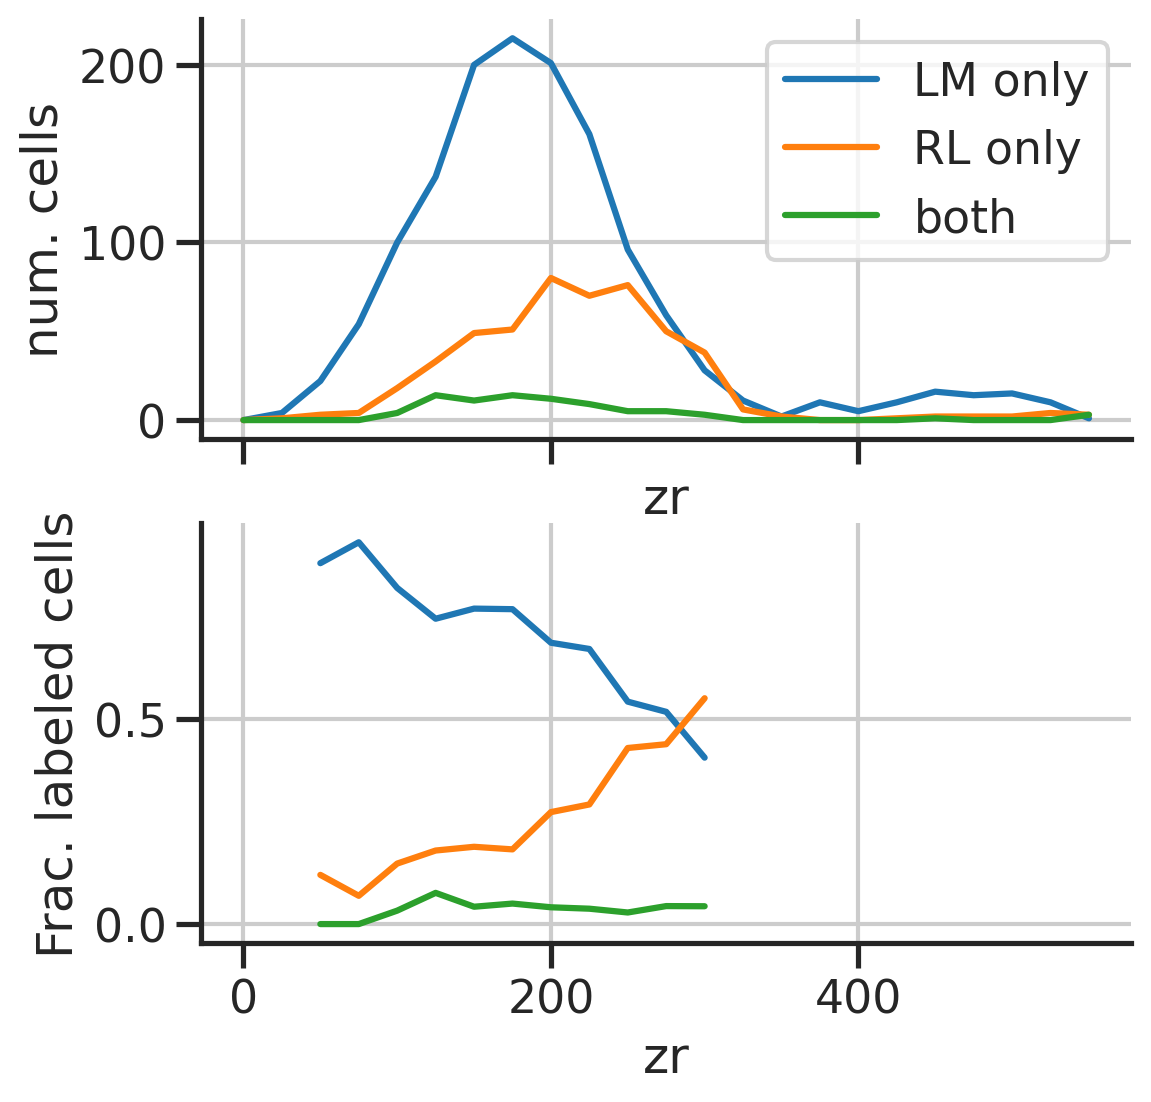

In [31]:
total = dfsize_z.sum(axis=1)
total_lbl = dfsize_z['LM']+dfsize_z['RL']+dfsize_z['both']

fig, axs = plt.subplots(2,1,figsize=(1*6,2*3), sharex=True)
ax = axs[0]
ax.plot(zbins[dfsize_z.index], total, label='total', color='gray')
ax.plot(zbins[dfsize_z.index], total_lbl, label='total lbl', color='k')
sns.despine(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('zr')
ax.set_ylabel('num. cells')

ax = axs[1]
cond = total > 20
ax.plot(zbins[dfsize_z.index][cond], (total_lbl/(total))[cond], color='k')
sns.despine(ax=ax)
ax.set_xlabel('zr')
ax.set_ylabel('Frac. cells')

fig, axs = plt.subplots(2,1,figsize=(1*6,2*3), sharex=True)
ax = axs[0]
ax.plot(zbins[dfsize_z.index], dfsize_z['LM'], label='LM only')
ax.plot(zbins[dfsize_z.index], dfsize_z['RL'], label='RL only')
ax.plot(zbins[dfsize_z.index], dfsize_z['both'], label='both')
sns.despine(ax=ax)
ax.set_xlabel('zr')
ax.set_ylabel('num. cells')
ax.legend(bbox_to_anchor=(1,1))

ax = axs[1]
cond = total_lbl > 20
ax.plot(zbins[dfsize_z.index][cond], ((dfsize_z['LM'])/(total_lbl))[cond])
ax.plot(zbins[dfsize_z.index][cond], ((dfsize_z['RL'])/(total_lbl))[cond])
ax.plot(zbins[dfsize_z.index][cond], ((dfsize_z['both'])/(total_lbl))[cond])
sns.despine(ax=ax)
ax.set_xlabel('zr')
ax.set_ylabel('Frac. labeled cells')

In [32]:
def plot_density_maps(dfsize_1, dfsize_2, dfsize_3):
    fig, axs = plt.subplots(1,4,figsize=(4*6,1*5), sharex=True,sharey=True)
    ax = axs[0]
    sns.heatmap(dfsize_1.T, ax=ax, cmap='rocket_r', cbar_kws=dict(shrink=0.5))
    ax.set_aspect('equal')
    ax.set_title('LM')

    ax = axs[1]
    sns.heatmap(dfsize_2.T, ax=ax, cmap='rocket_r', cbar_kws=dict(shrink=0.5))
    ax.set_aspect('equal')
    ax.set_title('RL')

    ax = axs[2]
    sns.heatmap(dfsize_3.T, ax=ax, cmap='rocket_r', cbar_kws=dict(shrink=0.5))
    ax.set_aspect('equal')
    ax.set_title('both')

    ax = axs[3]
    sns.heatmap(np.log2((dfsize_1.T+1)/(dfsize_2.T+1)), 
                cmap='coolwarm', 
                center=0,
                cbar_kws=dict(shrink=0.5)
               )
    ax.set_aspect('equal')
    ax.set_title('log2(LM/RL)')
    plt.show()

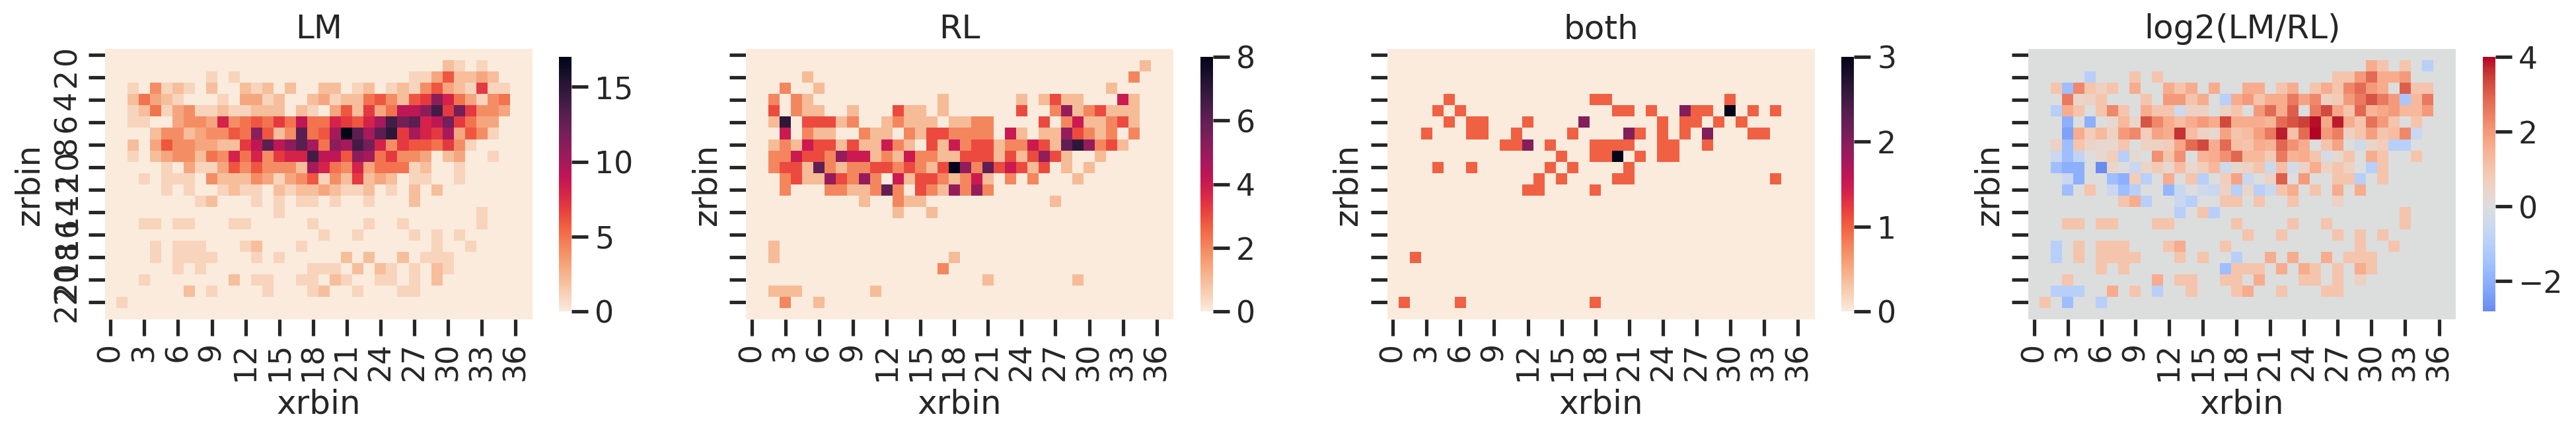

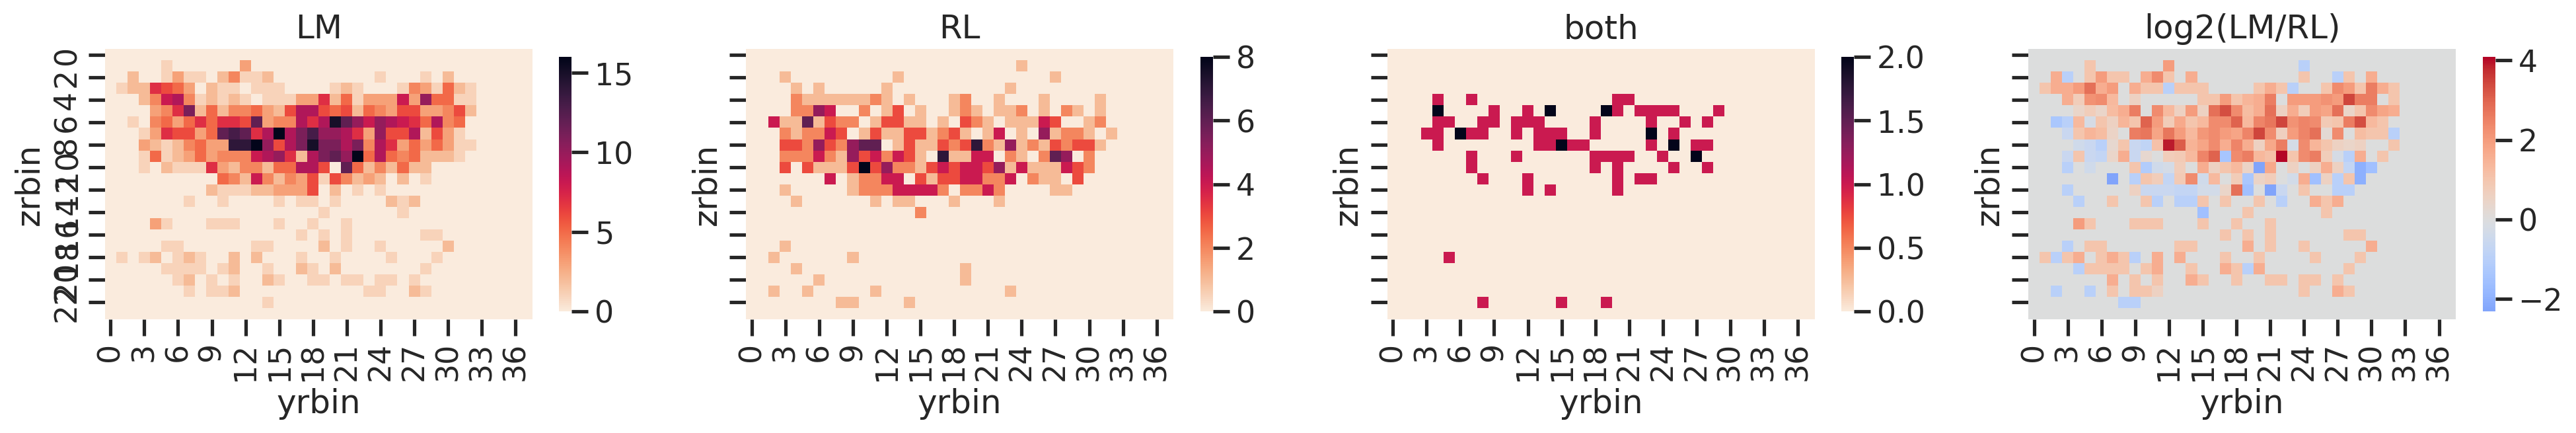

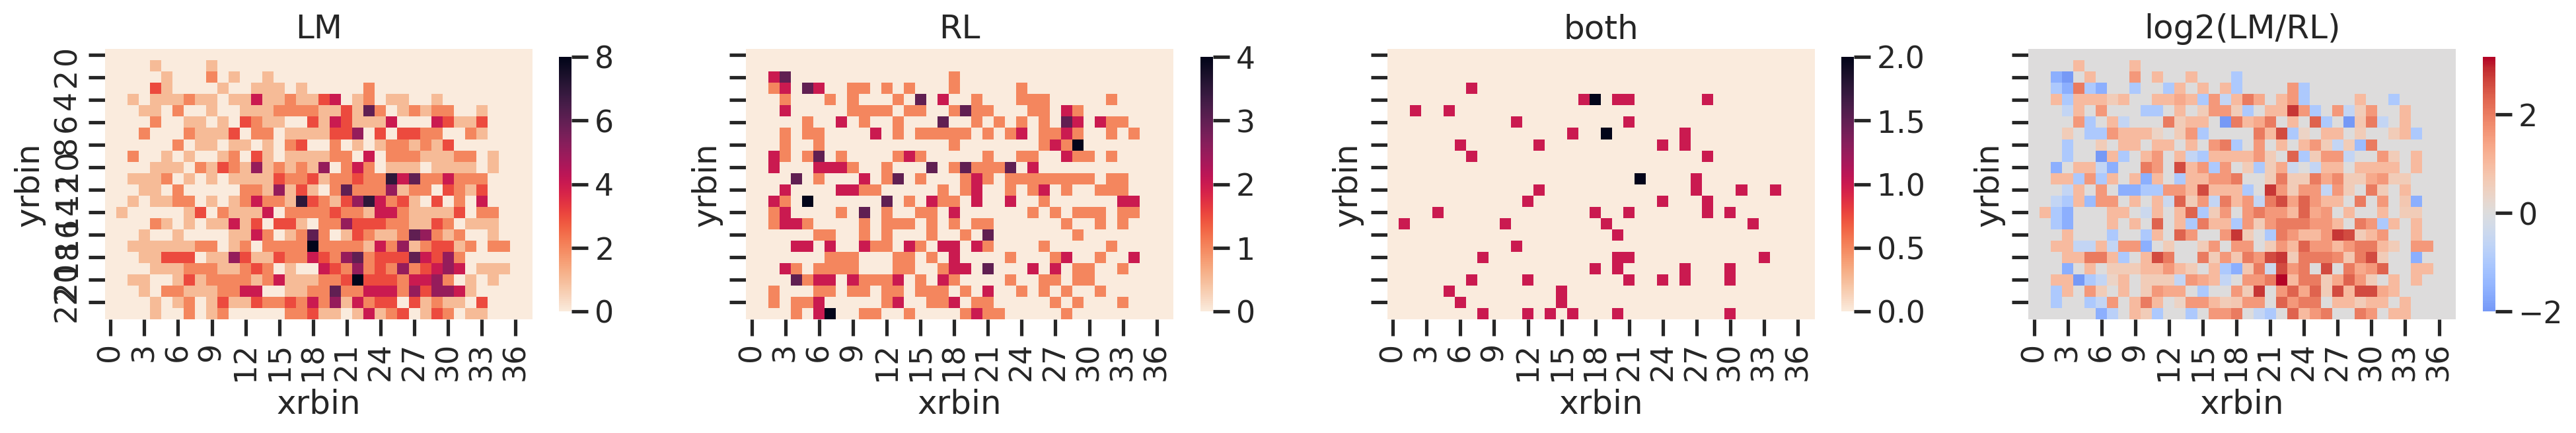

In [33]:
plot_density_maps(dfsize_xz1, dfsize_xz2, dfsize_xz3)
plot_density_maps(dfsize_yz1, dfsize_yz2, dfsize_yz3)
plot_density_maps(dfsize_xy1, dfsize_xy2, dfsize_xy3)

# at every x and y, compare z distribution

In [34]:
# dfsub = df[df['zrbin'] == 8]
# plot_easifish_proj(dfsub, 'xr', 'yr', invert_yaxis=True)
# plot_easifish_proj(dfsub, 'xr', 'zr', invert_yaxis=True)
# plot_easifish_proj(dfsub, 'yr', 'zr', invert_yaxis=True)

In [35]:
# xy
dfmean = df.groupby(['xrbin_s100', 'yrbin_s100', 'lbl_v2'])['zr'].mean().unstack().unstack() #.fillna(0).astype(int) #mean().unstack()

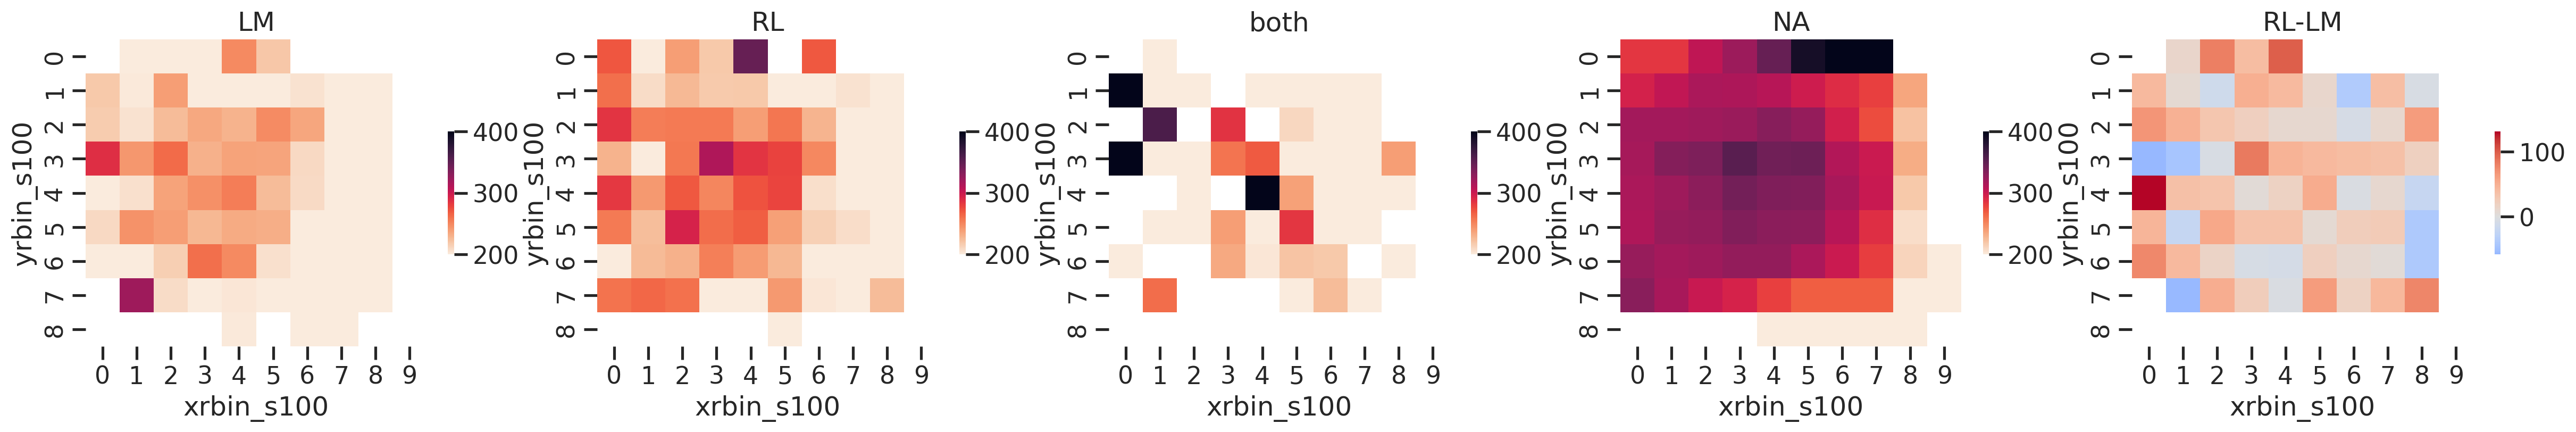

In [36]:
fig, axs = plt.subplots(1,5,figsize=(5*6,1*5))
for category, ax in zip(['LM', 'RL', 'both', 'NA'], axs):
    sns.heatmap(dfmean[category].T, 
                vmax=400, vmin=200, 
                cmap='rocket_r', cbar_kws=dict(shrink=0.3), 
                ax=ax)
    # ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(category)
    ax.grid(False)
    # ax.set_xticks([])
    # ax.set_yticks([])
ax = axs[4]
sns.heatmap(dfmean['RL'].T-dfmean['LM'].T, 
            cmap='coolwarm', cbar_kws=dict(shrink=0.3), 
            center=0,
            ax=ax)
# ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_title('RL-LM')
ax.grid(False)

In [37]:
# xy
dfsub = df[df['lbl_v2']!='NA'].copy()
dfsubmean = dfsub.groupby(['xrbin_s100', 'yrbin_s100', 'lbl_v2'])['zr'].mean().unstack().unstack() #.fillna(0).astype(int) #mean().unstack()
dfsubmeandiff = dfsubmean['RL']-dfsubmean['LM']


dfsubmeandiff_shuffs = []
n_rep = 1000
for i in range(n_rep): 
    dfsub['lbl_v2_shuff'] = np.random.choice(dfsub['lbl_v2'].values, size=len(dfsub), replace=False)
    dfsubmean_shuff = dfsub.groupby(['xrbin_s100', 'yrbin_s100', 'lbl_v2_shuff'])['zr'].mean().unstack().unstack() #.fillna(0).astype(int) #mean().unstack()
    dfsubmeandiff_shuffs.append(dfsubmean_shuff['RL']-dfsubmean_shuff['LM'])
dfsubmeandiff_shuffs = np.array(dfsubmeandiff_shuffs)
    
dfsubmeandiff_shuffmean = np.nanmean(dfsubmeandiff_shuffs, axis=0) # .shape

# dfsubmeandiff_shuffstd = np.nanstd(dfsubmeandiff_shuffs, axis=0) # .shape
# dfsubmeandiff_sigma = (dfsubmeandiff - dfsubmeandiff_shuffmean) /(dfsubmeandiff_shuffstd/np.sqrt(n_rep))

/tmp/ipykernel_152273/1166060883.py:15: RuntimeWarning: Mean of empty slice
  dfsubmeandiff_shuffmean = np.nanmean(dfsubmeandiff_shuffs, axis=0) # .shape


In [38]:
dfsubmeandiff_shuffs.shape

(1000, 9, 9)

In [39]:
pvals = (1+np.sum(np.abs(dfsubmeandiff_shuffs) > np.abs(dfsubmeandiff.values[np.newaxis,:,:]), axis=0))/n_rep
pvals

array([[0.001, 0.767, 0.594, 0.612, 0.025, 0.388, 0.025, 0.001, 0.001],
       [0.851, 0.93 , 0.47 , 0.274, 0.18 , 0.478, 0.207, 0.528, 0.001],
       [0.593, 0.812, 0.368, 0.929, 0.264, 0.148, 0.602, 0.039, 0.001],
       [0.437, 0.149, 0.355, 0.001, 0.886, 0.066, 0.885, 0.304, 0.001],
       [0.386, 0.156, 0.828, 0.002, 0.438, 0.007, 0.802, 0.946, 0.001],
       [0.001, 0.716, 0.805, 0.028, 0.009, 0.753, 0.222, 0.094, 0.001],
       [0.001, 0.463, 0.833, 0.056, 0.897, 0.124, 0.691, 0.735, 0.001],
       [0.001, 0.468, 0.708, 0.127, 0.738, 0.398, 0.879, 0.017, 0.001],
       [0.001, 0.935, 0.102, 0.418, 0.679, 0.144, 0.192, 0.139, 0.001]])

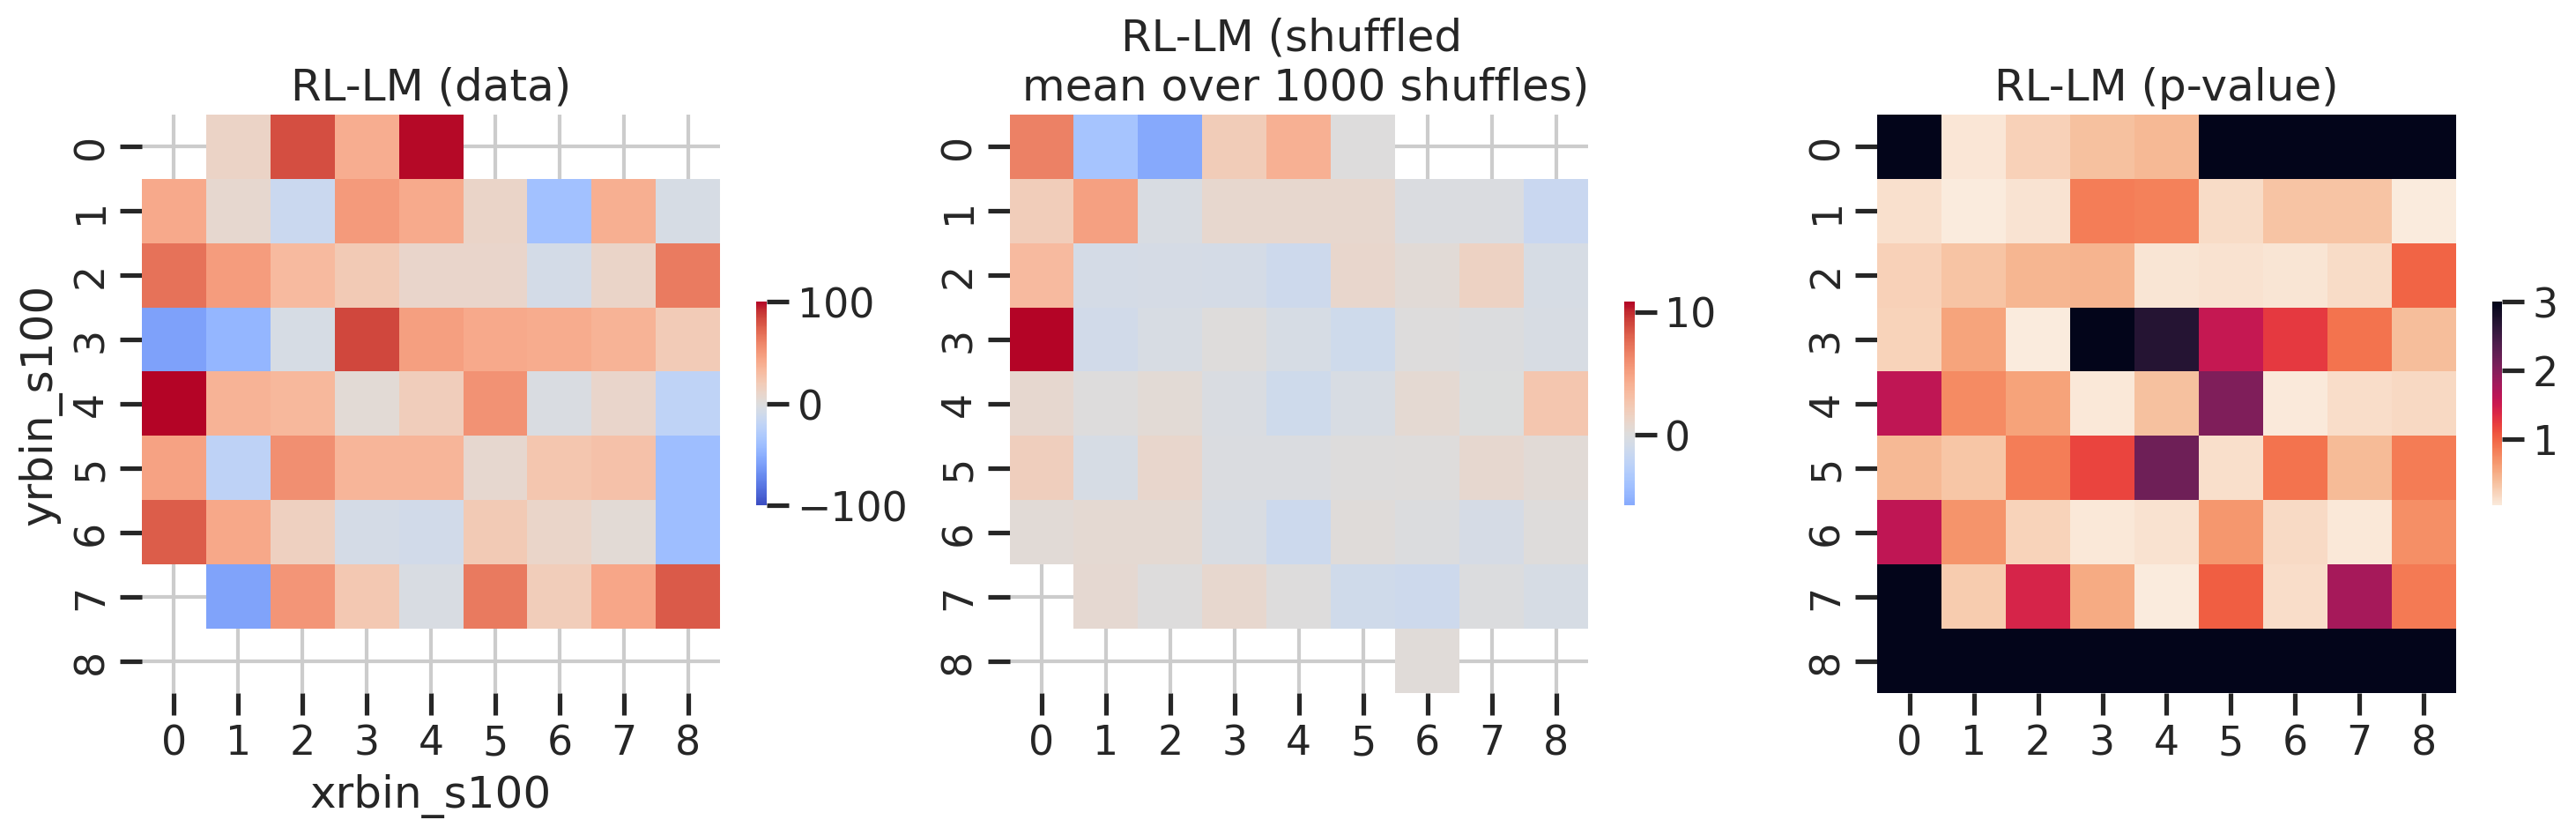

In [40]:
fig, axs = plt.subplots(1,3,figsize=(3*6,1*5))
ax = axs[0]
sns.heatmap(dfsubmeandiff.T, 
            cmap='coolwarm', cbar_kws=dict(shrink=0.3), 
            center=0, vmax=100, vmin=-100,
            ax=ax)
# ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_title('RL-LM (data)')

ax = axs[1]
sns.heatmap(dfsubmeandiff_shuffmean.T, 
            cmap='coolwarm', cbar_kws=dict(shrink=0.3), 
            center=0, 
            # vmax=100, vmin=-100,
            ax=ax)
# ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_title('RL-LM (shuffled \n mean over 1000 shuffles)')

ax = axs[2]
sns.heatmap(-np.log10(pvals).T, 
            cmap='rocket_r', cbar_kws=dict(shrink=0.3), 
            # center=0, 
            # vmax=100, vmin=-100,
            ax=ax)
# ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_title('RL-LM (p-value)')
ax.grid(False)

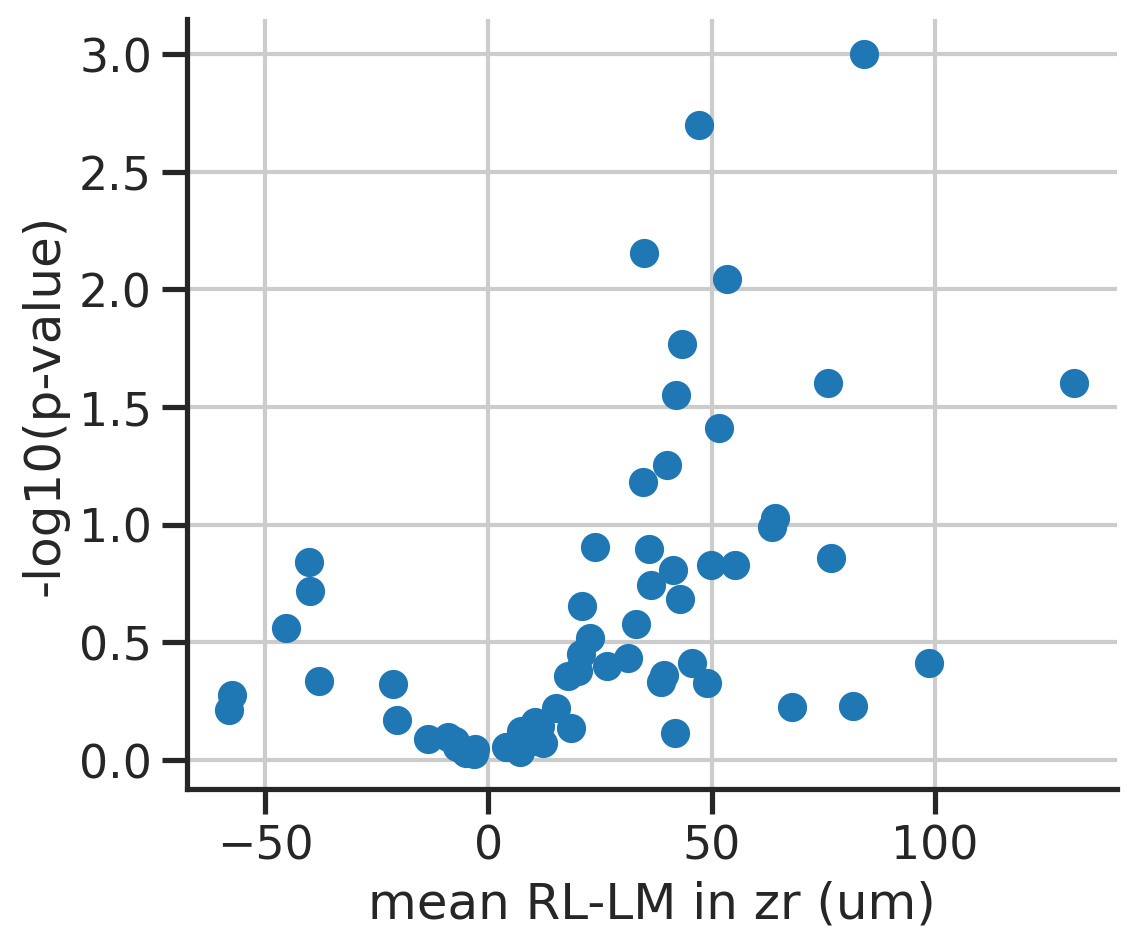

In [41]:
fig, ax = plt.subplots(1,1,figsize=(1*6,1*5))
ax.scatter(dfsubmeandiff.T, -np.log10(pvals).T)
ax.set_ylabel('-log10(p-value)')
ax.set_xlabel('mean RL-LM in zr (um)')
sns.despine(ax=ax)
plt.show()

# ax.grid(False)